In [2]:
import pandas as pd 
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings(action="ignore")

In [19]:
from sklearn.cluster import KMeans

def perform_segmentation(frame):
    # Reshape the frame to a 2D array
    pixels = frame.reshape(-1, 3)

    # Perform KMeans clustering on the pixels
    kmeans = KMeans(n_clusters=2,n_init="auto")
    kmeans.fit(pixels)

    # Extract the center of each cluster
    center = kmeans.cluster_centers_
    
    # Calculate the direction of motion
    direction = np.argmax(np.sum(center, axis=1))
    # print("Direction of motion:", direction)

    # Assign different colors to different directions of motion
    color_map = np.zeros((2, 3), dtype='uint8')
    if direction == 0:
        color_map[0] = [255,250,250]
        color_map[1] = [105,105,105]
    else:
        color_map[0] = [120,120,120]
        color_map[1] = [192,192,192]

    # Assign each pixel to a cluster
    label = kmeans.predict(pixels)

    # Reshape the label back to the shape of the frame
    label = label.reshape(frame.shape[:-1])

    # Replace each cluster label with its corresponding color
    labeled_frame = np.zeros_like(frame)
    for i in range(2):
        labeled_frame[label == i] = color_map[i]
        
    return labeled_frame

IndexError: index 12 is out of bounds for axis 0 with size 12

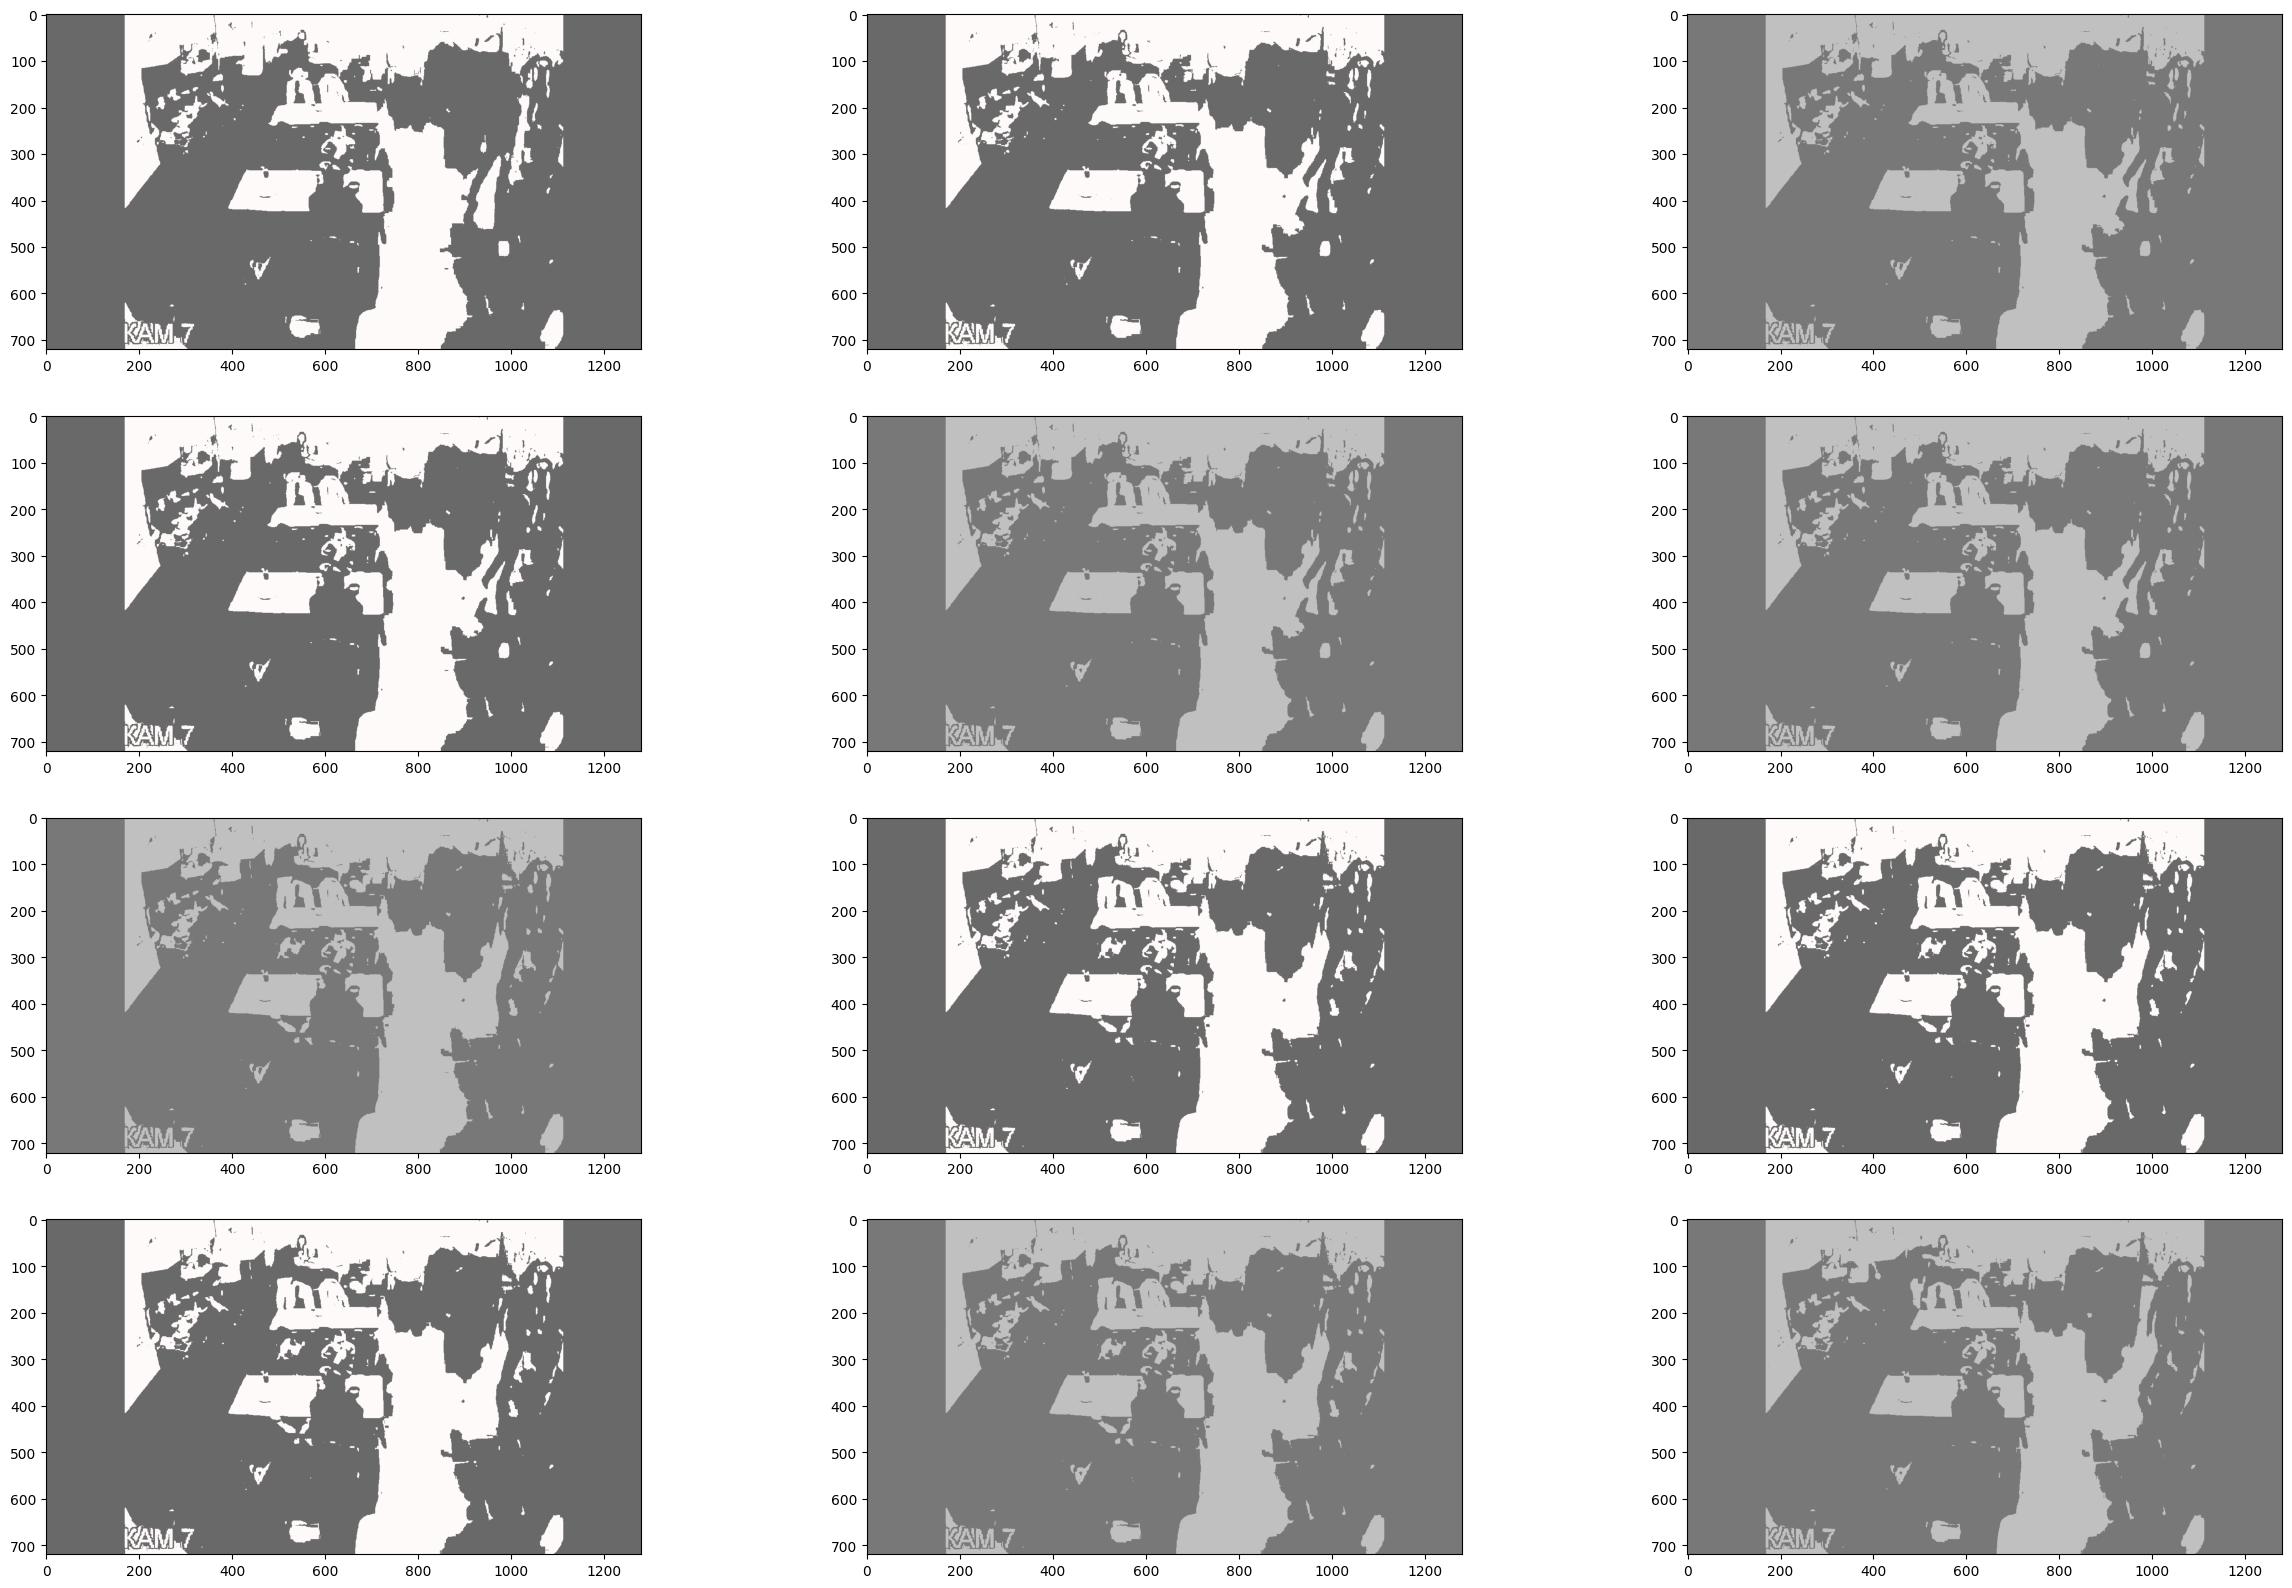

In [22]:
# Open the video
cap = cv.VideoCapture("../../SCVD/videos/Non-Violence Videos/NV1.mov")


# Get the video frame dimensions
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
img_idx = 0
# Define the codec and create the output video file
fourcc = cv.VideoWriter_fourcc(*'mp4v')
out = cv.VideoWriter('output.mp4', fourcc, 30, (frame_width, frame_height), isColor=True)
fig,ax = plt.subplots(4, 3, figsize=(30, 20))
ax = ax.flatten()
# Loop over the frames in the video
while True:
    ret, frame = cap.read()

    if not ret:
        break
    segmented_frame = perform_segmentation(frame)
    out.write(segmented_frame)
    if int (cap.get(1)) %cap.get(5):
        ax[img_idx].imshow(segmented_frame)
        img_idx +=1


# Release the video file and close all windows
cap.release()
out.release()
cv.destroyAllWindows()

In [40]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture("F:/Important/Python/Projects/3.CCTV Vilonce Detection/SCVD/videos/violence video cleaned/V1.mp4")
ret, frame1 = cap.read()
prvs = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[..., 1] = 255
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
   
size = (frame_width, frame_height)
   

result = cv.VideoWriter("Optical_flow.mp4", 
                         cv.VideoWriter_fourcc(*'mp4v'),
                         10, size)
while(1):
    ret, frame2 = cap.read()
    if not ret:
        print('No frames grabbed!')
        break
    next = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
    flow = cv.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang*180/np.pi/2
    hsv[..., 2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
    bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
    cv.imshow('frame2', bgr)
    result.write(bgr)
    cv.imshow("Frame",frame2)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv.imwrite('opticalfb.png', frame2)
        cv.imwrite('opticalhsv.png', bgr)
    prvs = next
cv.destroyAllWindows()

No frames grabbed!


In [41]:
result.release()

In [1]:
from scapy.all import *

def packet_callback(packet):
    print(packet.summary())

sniff(filter="tcp", prn=packet_callback)
